In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from tensorflow.keras.datasets import fashion_mnist

In [2]:
# Veri Seti Seçimi ve Yükleme
# Fashion MNIST veri setini yükleme
# Fashion MNIST veri seti, Keras kütüphanesinden seçilmiştir.
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Veri Ön İşleme
# Veri boyutlarını yazdırma
# Bu veri seti, 10 farklı sınıfa ait 70.000 gri tonlamalı görüntü içermektedir. Her görüntü 28x28 piksel boyutundadır. Eğitim için 60.000 görüntü, test için ise 10.000 görüntü kullanılmıştır.
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


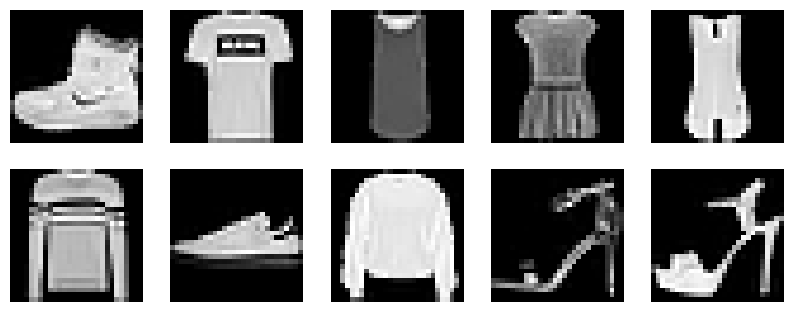

In [4]:
# Görüntü Boyutları ve Görselleştirme
# Eğitim veri setinden bazı örnek görüntüleri görselleştirme
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

In [5]:
# Verileri Normalizasyon
# Pixel değerlerini 0-255 aralığından 0-1 aralığına normalize etme
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# Model Oluşturma ve Eğitim Kısmı
# Derin öğrenme modeli oluşturma
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [7]:
# Modeli derleme ve eğitimi
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train[..., np.newaxis], y_train, epochs=10, validation_data=(X_test[..., np.newaxis], y_test))

Epoch 1/10
1875/1875 [==============================] - 69s 36ms/step - loss: 0.4437 - accuracy: 0.8380 - val_loss: 0.3531 - val_accuracy: 0.8737
Epoch 2/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2960 - accuracy: 0.8906 - val_loss: 0.2931 - val_accuracy: 0.8914
Epoch 3/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.2492 - accuracy: 0.9080 - val_loss: 0.2818 - val_accuracy: 0.8985
Epoch 4/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2189 - accuracy: 0.9184 - val_loss: 0.2513 - val_accuracy: 0.9074
Epoch 5/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1932 - accuracy: 0.9288 - val_loss: 0.2529 - val_accuracy: 0.9051
Epoch 6/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1705 - accuracy: 0.9369 - val_loss: 0.2583 - val_accuracy: 0.9100
Epoch 7/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.1509 - accuracy: 0.9431 - val_loss: 0.2544 -

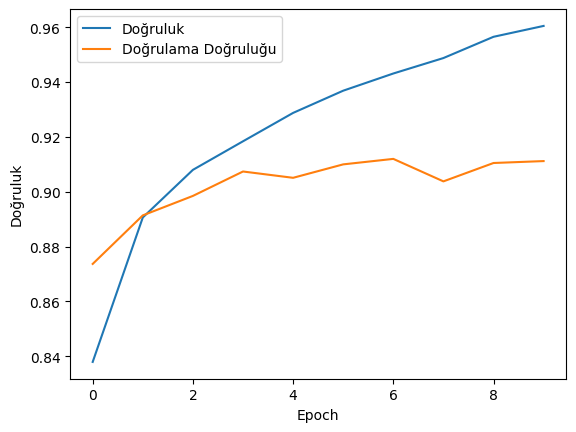

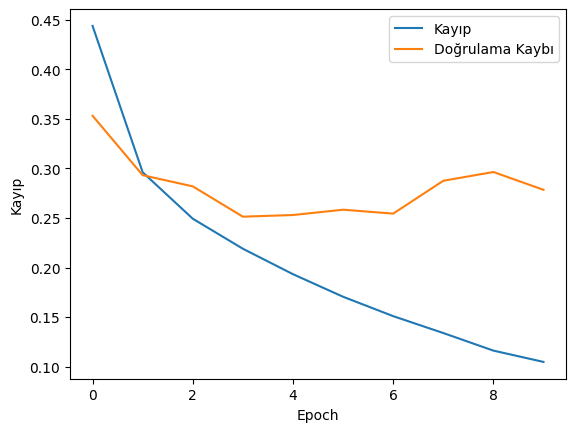

In [12]:
# Modelin doğruluğunu ve kayıplarını görselleştirme
plt.plot(history.history['accuracy'], label='Doğruluk')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Kayıp')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

In [8]:
# Model Performansı ve Değerlendirme
# Test veri setinde tahminler yapma
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = y_test


313/313 [==============================] - 3s 8ms/step


In [9]:
# Sınıflandırma raporunu yazdırma
print(classification_report(y_true_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.91      0.81      0.86      1000
           3       0.91      0.93      0.92      1000
           4       0.83      0.90      0.86      1000
           5       0.97      0.99      0.98      1000
           6       0.75      0.75      0.75      1000
           7       0.97      0.94      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



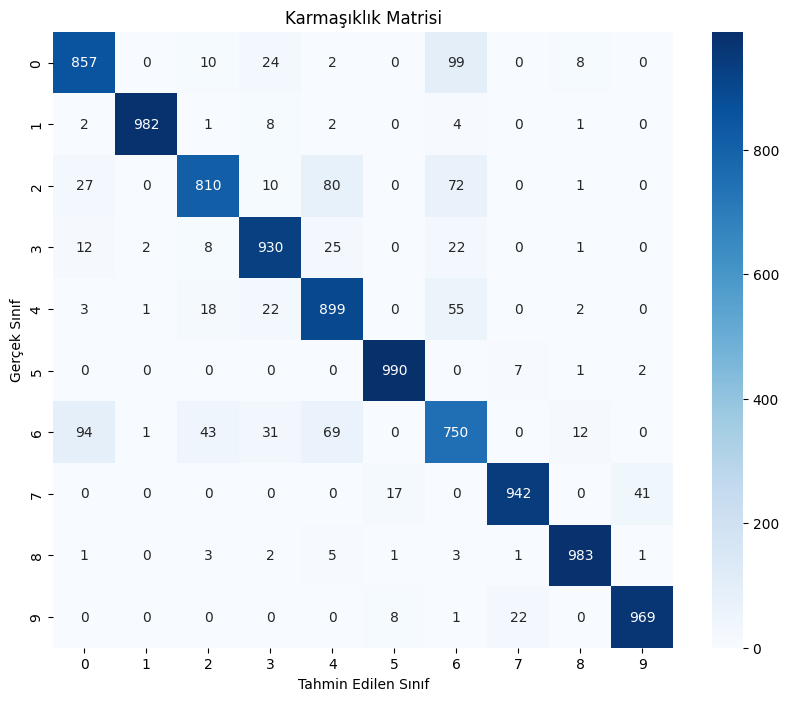

In [10]:
# Karmaşıklık Matrisi ve Görselleştirme
# Karmaşıklık matrisini hesaplama ve görselleştirme
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()


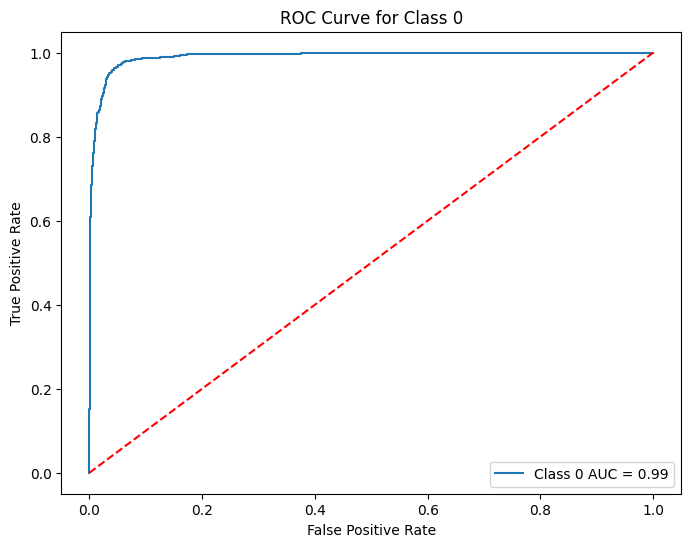

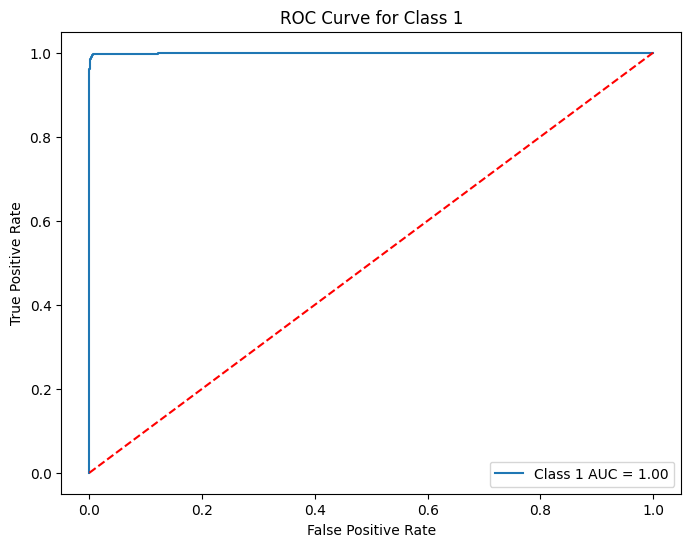

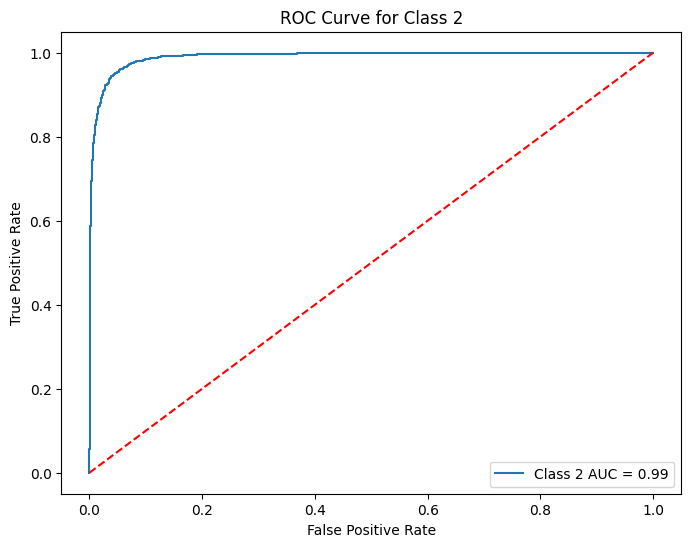

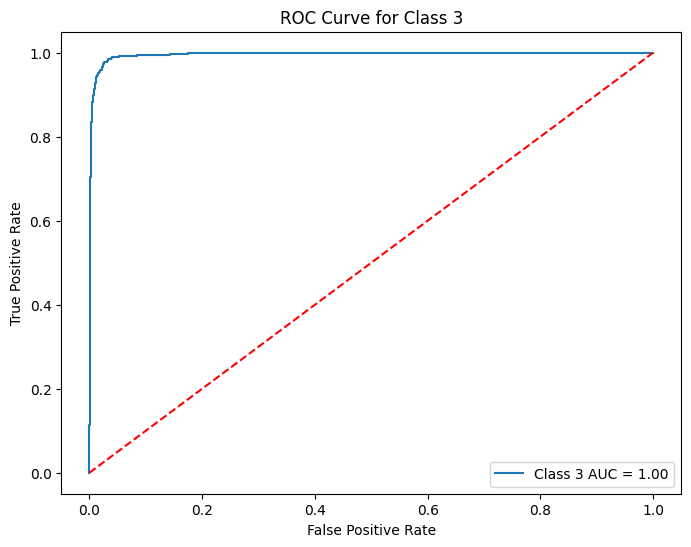

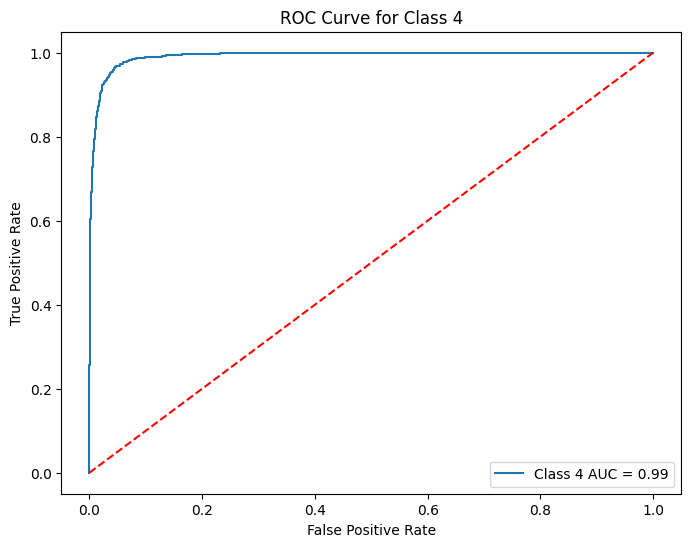

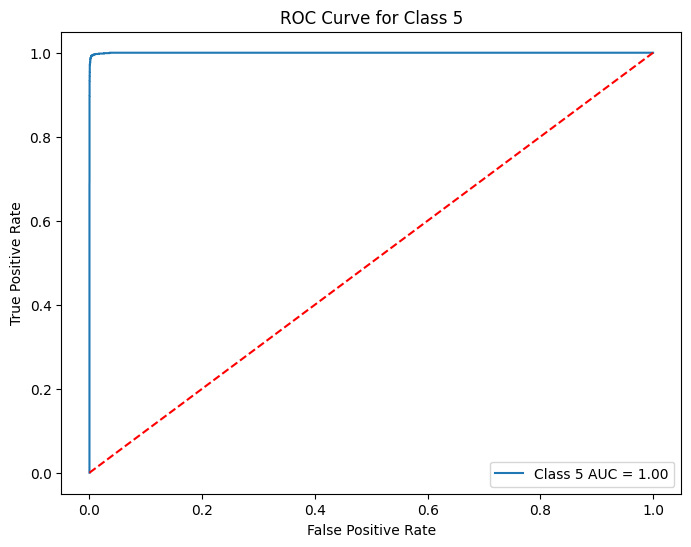

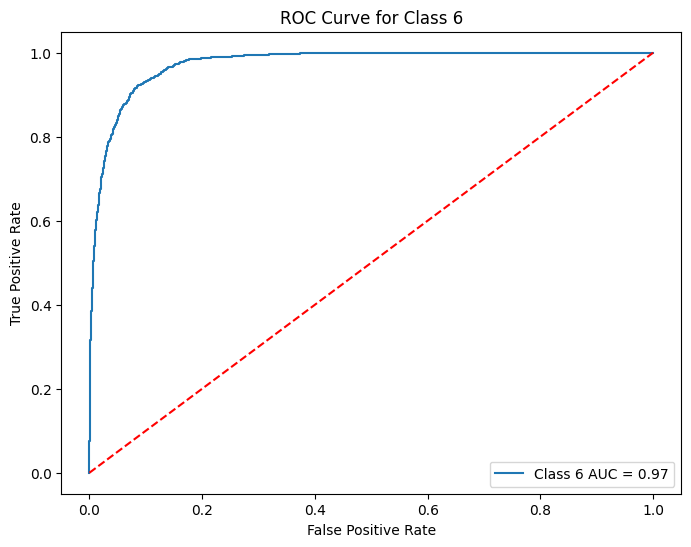

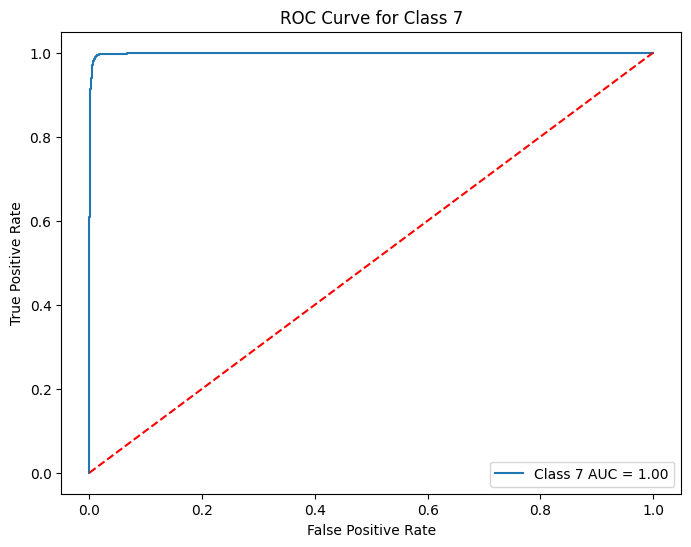

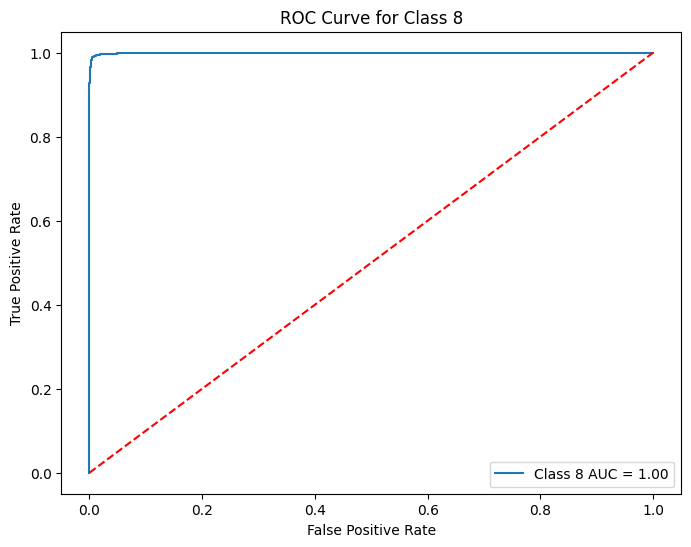

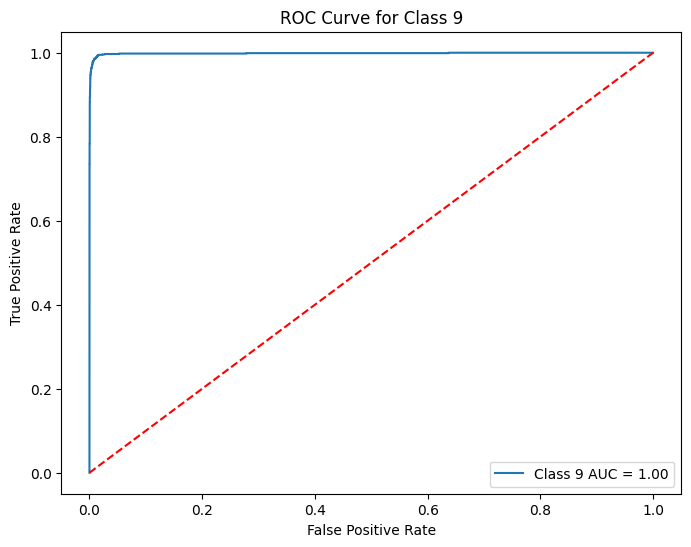

In [11]:
# ROC Eğrileri ve AUC Değerleri
# ROC eğrisi ve AUC değerlerini hesaplama ve görselleştirme
n_classes = 10  # Fashion MNIST veri setinde 10 sınıf bulunuyor
for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve(y_true_classes == i, y_pred[:, i])
    auc_score = roc_auc_score(y_true_classes == i, y_pred[:, i])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'Class {i} AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='red')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Class {i}')
    plt.legend()
    plt.show()